In [ ]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt # plotting
np.set_printoptions(threshold=sys.maxsize) # showing results without truncation

In [ ]:
# initialize population & compute the fitness function
def PopulationSize(population_size, num_states):
  population = np.empty((population_size, num_states))
  states = np.zeros(num_states)

  for individual in range(0, population_size):
    for gene in range(0, num_states):
      states[gene] = random.randint(0, 7) # choose a random number between 0 to 7
    population[individual] = states

  fitness = FitnessComputation(population)
  
  return population, fitness

def CountNonAttackingPairs(arr):
  count = 0

  for row in range(num_states):
    col = arr[row]
    for row2 in range(num_states): 
      if row2 == row:
        continue
      if arr[row2] == col:
        continue
      if row2 + arr[row2] == row + col:
        continue
      if row2 - arr[row2] == row - col:
        continue
      # if every pair of queens is non-attacking, add one
      count += 1
    
  # divide by 2 as pairs of queens are commutative
  return count/2

# calculate the fitness
# I used the number of non-attachking pairs in 8-queens as the evaluation function
def FitnessComputation(population):
  fitness = np.zeros(population.shape[0])

  for i in range(0, population.shape[0]):
    gene = population[i]
    fitness[i] = CountNonAttackingPairs(gene)

  return fitness

def ParentSelection(population, fitness):
  # get the sum of fitness array
  sum_fitness = np.sum(fitness)

  # get the percentage array (denominator == sum, numerator == each array value)
  fit_prob = fitness/sum_fitness

  sorted_prob = np.sort(np.copy(fit_prob))
  sorted_prob = sorted_prob[::-1] # change to descending order

  # randomly pick one parent, and the other parent would be one of neighbor gene, but is closer to x
  sorted_x = random.randint(0, np.rint(sorted_prob.shape[0]/5)-1)

  if sorted_x != len(sorted_prob)-1:
    sorted_y = sorted_x + 1
  else:
    sorted_y = sorted_x - 1

  found_x = False
  found_y = False
  for j in range(len(sorted_prob)):
    if sorted_prob[sorted_x] == fit_prob[j]:
      x = j
      found_x = True
    if sorted_prob[sorted_y] == fit_prob[j]:
      y = j
      found_y = True
    if found_x and found_y:
      break

  return x, y 

def Crossover(parent1, parent2):
  # randomly pick the crossover point from 1 to 6
  point = random.randint(2, 6)

  # crossover
  child1 = np.concatenate((parent1[0:point], parent2[point:8]))
  child2 = np.concatenate((parent2[0:point], parent1[point:8]))
  
  child1_fit = CountNonAttackingPairs(child1)
  child2_fit = CountNonAttackingPairs(child2)

  if child1_fit > child2_fit:
    return child1
  return child2

# mutation happened randomly
def MutationPct(percentage):
  if (random.random() < percentage):
    return True # mutation happens

In [ ]:
population_size = 100 # 10, 100, 500, 1000
num_states = 8 # 8 queens problem has 8 by 8 spaces
NumIterations = 30 # the number of maximum iteration
percentage = 0.05
avg_fitness = []

population, fitness = PopulationSize(population_size, num_states)

print("Initial Population: \n", population)

for iteration in range(0, NumIterations): 
  # calculate average fitness for plotting
  avg_fitness.append(np.sum(fitness)/len(fitness))

  new_population = []

  for i in range(0, population.shape[0]):
    # randomly select pairs of parents to breed & Crossover
    x, y = ParentSelection(population, fitness)
    child = Crossover(population[x], population[y])

    # randomly decide whether to mutate based on MutationPct, and if so, mutate one gene (Mutation only happened for the first child)
    if MutationPct(percentage):
      # pick the location for the mutation
      loc = random.randint(0, 7)
      # mutate the gene
      child[loc] = random.randint(0, 7) 

    # generate a sufficient number of children to keep the population size constant
    new_population.append(child)

  population = np.copy(new_population)
  fitness = np.copy(FitnessComputation(population))

print("Final Population: \n", population)

Initial Population: 
 [[7. 7. 3. 6. 6. 0. 6. 6.]
 [0. 0. 4. 1. 6. 7. 4. 3.]
 [6. 0. 4. 2. 3. 0. 6. 0.]
 [1. 5. 5. 5. 3. 5. 4. 7.]
 [1. 3. 6. 4. 4. 5. 1. 1.]
 [2. 5. 7. 7. 7. 1. 6. 3.]
 [0. 0. 0. 7. 7. 6. 2. 2.]
 [6. 7. 7. 1. 5. 5. 5. 6.]
 [3. 4. 5. 4. 2. 1. 2. 6.]
 [5. 3. 6. 1. 4. 3. 4. 3.]
 [3. 5. 6. 0. 3. 5. 6. 4.]
 [0. 3. 6. 5. 3. 4. 5. 0.]
 [3. 1. 0. 2. 5. 0. 1. 7.]
 [3. 2. 1. 5. 0. 1. 7. 2.]
 [3. 3. 5. 2. 2. 5. 6. 5.]
 [5. 1. 0. 5. 5. 2. 5. 2.]
 [7. 5. 3. 5. 7. 4. 0. 7.]
 [2. 6. 7. 5. 0. 5. 4. 6.]
 [6. 3. 3. 7. 0. 2. 2. 6.]
 [2. 5. 3. 4. 5. 1. 2. 7.]
 [5. 7. 3. 4. 4. 7. 1. 6.]
 [7. 5. 4. 6. 4. 2. 1. 7.]
 [3. 7. 7. 5. 4. 5. 5. 5.]
 [5. 0. 3. 2. 3. 6. 0. 2.]
 [6. 2. 5. 7. 0. 5. 6. 0.]
 [6. 6. 2. 7. 1. 5. 2. 1.]
 [1. 1. 4. 1. 7. 2. 0. 7.]
 [0. 3. 5. 2. 6. 1. 4. 3.]
 [5. 0. 5. 2. 5. 0. 4. 0.]
 [4. 7. 6. 7. 0. 5. 5. 1.]
 [0. 5. 2. 2. 4. 1. 2. 5.]
 [3. 7. 2. 7. 2. 5. 7. 3.]
 [0. 2. 3. 2. 7. 6. 4. 1.]
 [2. 5. 4. 4. 7. 3. 1. 2.]
 [4. 4. 5. 2. 2. 1. 2. 4.]
 [5. 7. 3. 5. 7. 3. 7. 5.]
 [2. 0

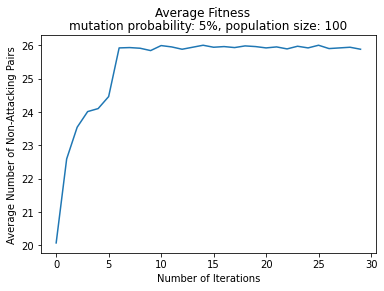

In [ ]:
plt.suptitle("Average Fitness" )
plt.title("mutation probability: 5%, population size: 100")
plt.plot(avg_fitness)
plt.ylabel('Average Number of Non-Attacking Pairs', fontsize = 10)
plt.xlabel('Number of Iterations', fontsize=10)
plt.show()